In [2]:
import ipywidgets
import mercury as mr
from mercury_app.decorator import as_controller
from matplotlib import pyplot as plt

voila executor
voila executor nbclient
classes
Mercury ======================


In [3]:
import anywidget
import traitlets

In [4]:
class CounterWidget(anywidget.AnyWidget):
    # Widget front-end JavaScript code
    _esm = """
    function render({ model, el }) {
      let getCount = () => model.get("count");
      let button = document.createElement("button");
      button.innerHTML = `count is ${getCount()}`;
      button.addEventListener("click", () => {
        model.set("count", getCount() + 1);
        model.save_changes();
      });
      model.on("change:count", () => {
        button.innerHTML = `count is ${getCount()}`;
      });
      el.appendChild(button);
    }
	export default { render };
    """
    # Stateful property that can be accessed by JavaScript & Python
    count = traitlets.Int(0).tag(sync=True)
    print('init')

    def __init__(self, *args, count=None, **kwargs):
        # If count is provided in kwargs or as an argument, use it. Otherwise, use the default.
        if count is not None:
            kwargs['count'] = count
        elif 'count' not in kwargs:
            kwargs['count'] = 0
        super().__init__() #*args, **kwargs)
        self.count = kwargs['count']
        print('init:', self.count)
    
    def _repr_mimebundle_(self, **kwargs):
        data = super()._repr_mimebundle_()
        print(data)
        if len(data) > 1:
            view = {
                "count": self.count,
            }
            import json
            data[0]["application/mercury+json"] = json.dumps(view, indent=4)
            #if "text/plain" in data:
            #    del data["text/plain"]

        return data

init


In [5]:
counter = CounterWidget()

init: 0


In [6]:
counter

({'text/plain': 'CounterWidget()', 'application/vnd.jupyter.widget-view+json': {'version_major': 2, 'version_minor': 1, 'model_id': '3ff950d186f44a8d9ffea906976de4fa'}}, {})


CounterWidget()

In [7]:
counter

({'text/plain': 'CounterWidget()', 'application/vnd.jupyter.widget-view+json': {'version_major': 2, 'version_minor': 1, 'model_id': '3ff950d186f44a8d9ffea906976de4fa'}}, {})


CounterWidget()

In [8]:
counter2 = CounterWidget(count=3)

init: 3


In [9]:
counter2

({'text/plain': 'CounterWidget(count=3)', 'application/vnd.jupyter.widget-view+json': {'version_major': 2, 'version_minor': 1, 'model_id': '79811bdde60849a28cee8d71d43b561a'}}, {})


CounterWidget(count=3)

In [10]:
counter2.model_id

'79811bdde60849a28cee8d71d43b561a'

In [57]:
import anywidget
import traitlets

class SliderWidget(anywidget.AnyWidget):
    _esm = """
    function render({ model, el }) {
      // Container for the whole widget
      let container = document.createElement("div");
      container.classList.add("slider-container");

      // Top label (left-aligned)
      let topLabel = document.createElement("div");
      topLabel.classList.add("slider-top-label");
      topLabel.innerHTML = model.get("label") || "Select number";

      // Row: slider and value label
      let sliderRow = document.createElement("div");
      sliderRow.classList.add("slider-row");

      // Slider input
      let slider = document.createElement("input");
      slider.type = "range";
      slider.min = model.get("min");
      slider.max = model.get("max");
      slider.value = model.get("value");
      slider.classList.add("slider-input");

      // Value label (to the right of slider)
      let valueLabel = document.createElement("span");
      valueLabel.classList.add("slider-value-label");
      valueLabel.innerHTML = model.get("value");

      slider.addEventListener("input", () => {
        model.set("value", Number(slider.value));
        model.save_changes();
      });

      model.on("change:value", () => {
        slider.value = model.get("value");
        valueLabel.innerHTML = model.get("value");
      });

      // Assemble row
      sliderRow.appendChild(slider);
      sliderRow.appendChild(valueLabel);

      // Build structure
      container.appendChild(topLabel);
      container.appendChild(sliderRow);
      el.appendChild(container);
    }
    export default { render };
    """
    _css = """
    .slider-container {
        display: flex;
        flex-direction: column;
        align-items: flex-start;
        width: 100%;
        min-width: 120px;
    }
    .slider-top-label {
        margin-bottom: 6px;
        font-weight: bold;
        text-align: left;
        width: 100%;
    }
    .slider-row {
        display: flex;
        flex-direction: row;
        align-items: center;
        width: 100%;
    }
    .slider-input {
        flex: 1 1 auto;
        min-width: 60px;
        max-width: 100%;
        margin-right: 16px;
    }
    .slider-value-label {
        font-weight: bold;
        font-size: 1.1em;
        min-width: 32px;
        text-align: left;
        margin-left: 8px;
        white-space: nowrap;
    }
    """

    value = traitlets.Int(0).tag(sync=True)
    min = traitlets.Int(0).tag(sync=True)
    max = traitlets.Int(100).tag(sync=True)
    label = traitlets.Unicode("Select number").tag(sync=True)

# Usage:
slider = SliderWidget(value=34, min=0, max=100, label="Select number")
slider


SliderWidget(value=34)

In [58]:
slider.value

34

In [59]:
slider

SliderWidget(value=34)

In [17]:
#

my_selection = mr.Select(value = "blue", choices = ["blue", "red", "green"], label = "Select color")

mercury.Select

In [48]:
my_selection.code_uid

'Select.0.50.104.3-rand0e740f4e'

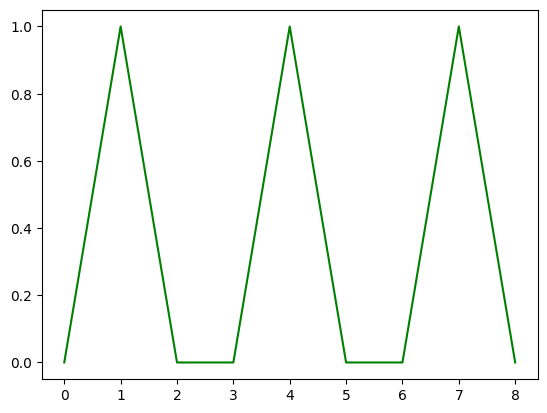

In [49]:
_ = plt.plot([0,1,0] * 3, color=my_selection.value)

In [50]:
texti = as_controller(ipywidgets.IntSlider())
texti

IntSlider(value=0)

In [51]:
print(texti.value)

0


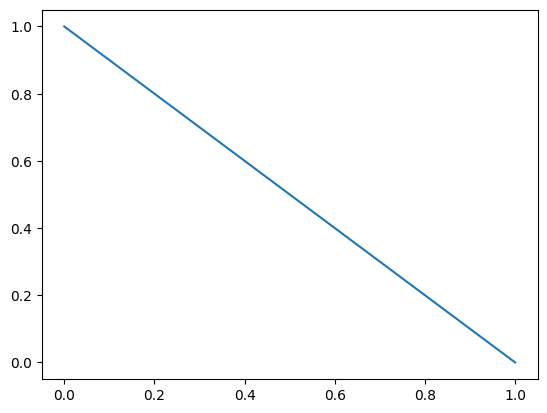

In [52]:
_ = plt.plot([1, int(texti.value)])

In [53]:
from ipyleaflet import Map, Marker
from ipywidgets import Output, VBox

out = Output()
m = Map(center=(51.505, -0.09), zoom=5)

def handle_map_click(**kwargs):
    # Only respond to 'click' events
    if kwargs.get('type') == 'click':
        latlng = kwargs.get('coordinates')
        if latlng:
            marker = Marker(location=latlng)
            m.add_layer(marker)
            with out:
                print(f"Marker added at {latlng}")

m.on_interaction(handle_map_click)

VBox([m, out])


In [54]:
from tldraw import TldrawWidget
t = TldrawWidget(width=1299)
t

TldrawWidget(width=1299)

In [55]:
from tldraw import TldrawWidgetCoordinates


t = TldrawWidgetCoordinates(
    points_new=[[100, 200], [100, 300], [200, 300], [50, 50], [500, 50]]
)
t

TldrawWidgetCoordinates(points_new=[[100, 200], [100, 300], [200, 300], [50, 50], [500, 50]])

In [56]:
from tldraw import TldrawWidgetCoordinates

import numpy as np

x = np.arange(100, 400, 1)
y = 150+100*np.sin(x*0.1)

points = np.column_stack((x, y)).tolist()

TldrawWidgetCoordinates(points_new=points)

TldrawWidgetCoordinates(points_new=[[100.0, 95.59788891106302], [101.0, 87.49293511071166], [102.0, 80.0125312…